In [24]:
# Importing Libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [26]:
data=np.load("fourth_batch_multi_labels.npz")

In [28]:
X=data["X"]
y=data["yy"]



XX=pd.DataFrame(X)
yy=pd.DataFrame(y)
XX.rename(columns={0:"user",1:"item",2:"rating"},inplace=True)
yy.rename(columns={0:"user",1:"label"},inplace=True)

In [30]:
XX.head()

,user,item,rating
0,3531,0,1
1,3531,1,1
2,3531,6,1
3,3531,7,10
4,3531,9,10


In [32]:
yy.head()

,user,label
0,3240,0
1,3241,1
2,3242,0
3,3243,2
4,3244,0


In [149]:
merged_df = pd.merge(XX, yy, on='user')
merged_df.head()

,user,item,rating,label
0,3531,0,1,0
1,3531,1,1,0
2,3531,6,1,0
3,3531,7,10,0
4,3531,9,10,0


In [151]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import skew, kurtosis
# Basic user features
df_user_features = XX.groupby('user').agg(
    mean_rating=('rating', 'mean'),
    #median_rating=('rating', 'median'),
    std_rating=('rating', 'std'),
    #this was the only thing i added, it was based off one of the features i added on my original one that made significant impact
    total_rating=('rating','sum'),
        
    count_dislike=('rating', lambda x: (x == -10).sum()),
    count_neutral=('rating', lambda x: (x == 0).sum()),
    count_like=('rating', lambda x: (x == 10).sum()),
    count_watched=('rating', lambda x: (x == 1).sum()),
    total_interactions=('rating', 'count')
)

# Ratio features
#df_user_features['like_ratio'] = df_user_features['count_like'] / df_user_features['total_interactions']
#df_user_features['dislike_ratio'] = df_user_features['count_dislike'] / df_user_features['total_interactions']
#df_user_features['neutral_ratio'] = df_user_features['count_neutral'] / df_user_features['total_interactions']
#df_user_features['watched_ratio'] = df_user_features['count_watched'] / df_user_features['total_interactions']
df_user_features.head()

,mean_rating,std_rating,total_rating,count_dislike,count_neutral,count_like,count_watched,total_interactions
user,,,,,,,,
3240,0.433962,6.371878,184,84,99,87,154,424
3241,-1.136691,7.153798,-158,46,25,26,42,139
3242,-0.747368,6.804867,-142,54,44,34,58,190
3243,1.860759,7.297232,147,16,8,28,27,79
3244,4.600000,4.760129,161,0,9,15,11,35


In [152]:
from sklearn.cluster import KMeans

In [155]:
kmeans = KMeans(n_clusters = 3, max_iter = 300)
#df_analyse = df_user_features[['like_ratio','dislike_ratio','watched_ratio']]
#kmeans.fit(df_analyse)
kmeans.fit(df_user_features)

C:\Users\Garion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=3)

In [156]:
kmeans.cluster_centers_

array([[   2.1265036 ,    5.98815752,   71.96875   ,   22.92013889,
          25.22569444,   26.12152778,   39.95486111,  114.22222222],
       [   3.72562727,    5.52494416,  507.40740741,   13.14814815,
          35.17989418,   58.32275132,   55.66137566,  162.31216931],
       [   3.76984316,    5.51063206, 1186.54794521,   20.        ,
          73.2739726 ,  127.21917808,  114.35616438,  334.84931507]])

In [157]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 0 0 0 1 1 0 2 0 0 1 0 1 1 0 1 1 2 1 0 0 1 1 1 1 0 0 2 1 0 0 0 0 1 1 1
 0 1 0 1 1 1 1 0 0 0 0 1 0 0 2 0 0 0 0 0 1 0 1 0 2 0 2 1 0 1 0 0 0 0 0 0 2
 0 0 1 0 0 0 0 1 0 0 1 0 0 2 0 0 0 0 2 2 2 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0
 2 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 2 1 0 0 1 1 2 0 2 1 0 1 1 1 2 2 0 0
 0 0 1 0 2 1 2 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1
 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 2 0 0 2 1 0 1 0 1 0 0 1 1
 1 0 2 0 0 2 1 1 0 1 0 0 1 0 0 0 0 0 2 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1
 0 0 0 2 1 0 0 1 0 2 0 0 0 0 1 1 0 2 0 0 1 1 0 1 2 0 2 0 1 1 2 0 2 0 1 1 0
 0 0 0 1 0 2 0 0 1 0 1 0 1 1 1 2 1 0 1 0 0 1 0 0 1 0 0 1 2 0 1 2 0 2 1 0 0
 1 0 0 1 2 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 2 0 0 2 0 1 0
 1 2 2 1 0 0 0 1 0 0 1 0 1 0 2 0 0 1 0 0 0 2 1 1 0 1 1 0 1 1 2 0 0 0 0 0 2
 0 0 2 0 1 2 0 0 0 0 2 2 0 1 2 1 2 1 1 1 0 0 0 1 0 0 1 1 2 1 1 2 1 2 0 0 1
 0 0 1 0 2 0 0 0 0 1 0 0 0 2 1 1 0 0 1 0 0 0 0 0 1 0 1 2 1 0 2 0 2 2 0 0 2
 0 0 1 2 2 1 1 0 1 0 1 0 

In [161]:
print(type(kmeans.labels_))
unique,counts = np.unique(kmeans.labels_, return_counts = True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 288, 1: 189, 2: 73}


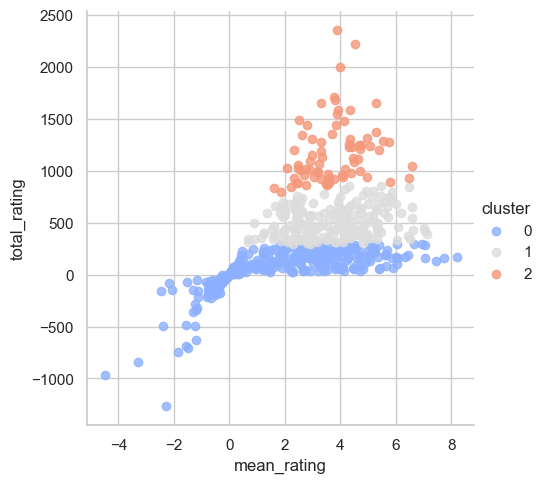

In [163]:
df_user_features['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot(x='mean_rating', y='total_rating', data=df_user_features,hue='cluster',palette='coolwarm', aspect =1, fit_reg=False)